# Homework 4

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Defining a function to sample an arbitrary pdf

In [5]:
#Draws n samples from the 1D pdf distribution pdf(t).
#pdf(t) can be an arbitrary pdf over 1 variable with lower bound 0.0.
#pdf is defined over domain [0, T].
#resoution (i.e., step size) of prob_t is dt.
#Notes: should choose T and dt such that T >> dt and pdf(t > T) ~ 0.0.
def pdf_samples(pdf, T, dt, n):
    if int(T / dt) == T / dt:
        t = np.arange(0.0, T + dt, dt)
    else:
        t = np.arange(0.0, T, dt)
    
    p = pdf(t)
    p = p / np.sum(p)
    
    return np.random.choice(t, n, p=p)

(array([ 0.65888889,  0.29333333,  0.09333333,  0.03777778,  0.01777778,
         0.00666667,  0.00111111,  0.        ,  0.        ,  0.00222222]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

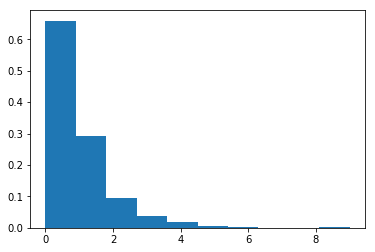

In [30]:
def Poisson_times(t, tau):
    return (1.0 / tau) * np.exp(-t / tau)

def Poisson_times_1_var(t):
    return fake_prob(t, 1.0)

samples = pdf_samples(fake_prob_1_var, 100.0, 0.1, 1000)

plt.hist(samples, normed=True)

## Now, the actual homework...

## Problem 3

In [69]:
#Using Problem 8 method from previous homework, estimate diffusion coefficient
#for 2D random walk. dt is time step, x and y are arrays with measured
#locations in x and y.
def diffusion_coefficient(dt, x, y):
    D_x = (1 / (2.0 * dt)) * (np.mean(np.diff(x)**2) + 2.0 * np.mean(np.diff(x[:-1]) * np.diff(x[1:])))
    D_y = (1 / (2.0 * dt)) * (np.mean(np.diff(y)**2) + 2.0 * np.mean(np.diff(y[:-1]) * np.diff(y[1:])))
    D = np.mean([D_x, D_y])
    return D

In [70]:
domain_1 = np.loadtxt('domain_diffusion/Domain1_dt0.068_a0.60.txt', delimiter=',')
domain_2 = np.loadtxt('domain_diffusion/Domain2_dt0.068_a0.89.txt', delimiter=',')
domain_3 = np.loadtxt('domain_diffusion/Domain3_dt0.068_a0.83.txt', delimiter=',')
domain_4 = np.loadtxt('domain_diffusion/Domain4_dt0.068_a0.62.txt', delimiter=',')
domain_5 = np.loadtxt('domain_diffusion/Domain5_dt0.068_a0.83.txt', delimiter=',')
domain_6 = np.loadtxt('domain_diffusion/Domain6_dt0.068_a1.21.txt', delimiter=',')
#plt.plot(domain_1[0,:], domain_1[1,:])

### Part a

[0.17283311796228801, 0.14059902632906202, 0.16991529482498896, 0.16699446834494616, 0.11345182493441688, 0.10542856804861211]


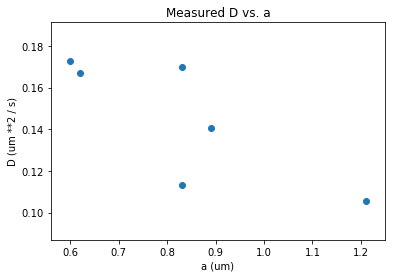

In [71]:
dt = 0.0681 #s
a_vals = [0.60, 0.89, 0.83, 0.62, 0.83, 1.21] #um
domains = [domain_1, domain_2, domain_3, domain_4, domain_5, domain_6]

D_vals = [diffusion_coefficient(dt, item[0, :], item[1, :]) for item in domains] #um**2 / s

print(D_vals)

plt.clf()
plt.scatter(a_vals, D_vals)
plt.title('Measured D vs. a')
plt.xlabel('a (um)')
plt.ylabel('D (um **2 / s)')

### Part b

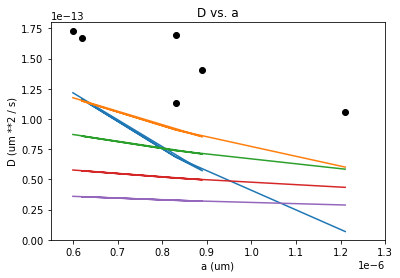

In [81]:
def theoretical_D_SI(a, eta_m, eta_w=8.90*10**-4.0, T=298.0):
    k_B = 1.381 * 10.0**-23.0
    gamma = 0.5772156649
    return ((k_B * T) / (4 * np.pi * eta_m)) * (np.log(eta_m / (eta_w * a)) - gamma)

D_vals_SI = [(10.0 ** -6.0)**2.0 * item for item in D_vals] #m**2 / s
a_vals_SI = [(10.0 ** -6.0) * item for item in a_vals] #m
eta_m = [2.0 * 10**-9.0, 4.0 * 10**-9.0, 8.0 * 10**-9.0, 16.0 * 10**-9.0, 32.0 * 10**-9.0]

'''
print(D_vals)
print(D_vals_SI)
print(a_vals)
print(a_vals_SI)
'''
plt.clf()
plt.title('D vs. a')
plt.xlabel('a (um)')
plt.ylabel('D (um **2 / s)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlim(5.5 * 10**-7.0, 13.0 * 10**-7.0)
#plt.ylim(1.05 * 10**-13.0, 1.8 * 10**-13.0)
plt.ylim(0.0 * 10**-13.0, 1.8 * 10**-13.0)

plt.scatter(a_vals_SI, D_vals_SI, color='black')

for eta in eta_m:
    D_vals_SI_theoretical = [theoretical_D_SI(item, eta) for item in a_vals_SI]
    plt.plot(a_vals_SI, D_vals_SI_theoretical)

The orange curve, corresponding to eta_m = 4.0 * 10^-9.0 Pa s m, roughly looks like the best fit. Everything is off in y, which might mean that the assumed temperature of T = 298 K was wrong, which would also imply that the assumed value of eta_w = 8.9 * 10^-4.0 Pa s was wrong.

### Part c

In [87]:
bilayer_thickness = 4.0 * 10**-9.0 # approximated from picture on Wikipedia article "Lipid bilayer".

eta_m_3D = eta_m[1] / bilayer_thickness
print(eta_m_3D)

1.0


So the equivalent 3D viscosity is about 1 Pa s. Looking at the Wikipedia article "Viscosity", this is roughly the viscosity of e.g., corn syrup, which clocks in at 1.4 Pa s.

## Problem 6

In [6]:
#Draws n samples from the 1D pdf distribution pdf(t).
#pdf(t) can be an arbitrary pdf over 1 variable with lower bound 0.0.
#pdf is defined over domain [0, T].
#resoution (i.e., step size) of prob_t is dt.
#Notes: should choose T and dt such that T >> dt and pdf(t > T) ~ 0.0.
def pdf_samples(pdf, T, dt, n):
    if int(T / dt) == T / dt:
        t = np.arange(0.0, T + dt, dt)
    else:
        t = np.arange(0.0, T, dt)
    
    p = pdf(t)
    p = p / np.sum(p)
    
    return np.random.choice(t, n, p=p)

#polynomial fit of arrays (note: can't be lists) y to x
#deg is the polynomial degrees, e.g., if deg=[0, 1, 2], returns np.array(a, b, c)
#such that y(x) = a * x**0 + b * x**1 + c * x**2
def custom_regression(x, y, deg):
    matrix = np.stack([x**d for d in deg], axis=-1)   # stack them like columns
    coeff = np.linalg.lstsq(matrix, y)[0]    # lstsq returns some additional info we ignore

    return coeff

In [7]:
def poisson_times(t, tau):
    return (1.0 / tau) * np.exp(-t / tau)

def run_and_tumble(N, v, tau):
    
    poisson_times_tau = lambda t: poisson_times(t, float(tau))
    
    phi_list = (np.random.uniform(low=0.0, high=2.0*np.pi, size=(N, 1)))
    phi_list = np.transpose(phi_list)[0]
    
    t_list = pdf_samples(poisson_times_tau, tau * 10.0, tau / 100.0, N)
    
    v_x_list = (v * np.cos(phi_list))
    v_y_list = (v * np.sin(phi_list))
    
    x_list = v_x_list * t_list
    x_list = np.cumsum(x_list, axis=0)
    x_list = np.append(np.array([0.0]), x_list)
    
    y_list = v_y_list * t_list
    y_list = np.cumsum(y_list)
    y_list = np.append(np.array([0.0]), y_list)
    
    return x_list, y_list, np.append(np.array([0.0]), t_list)

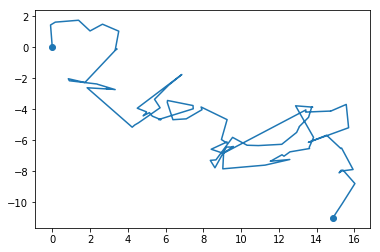

In [8]:
test = run_and_tumble(100, 1.0, 1.0)

plt.clf()
plt.scatter([test[0][0], test[0][-1]], [test[1][0], test[1][-1]])
plt.plot(test[0], test[1])

### Part b

I'll average 100 trials, each with 1000 trajectories, to show that < r^2(t) > is proportional to t.

[ 2.05835248]


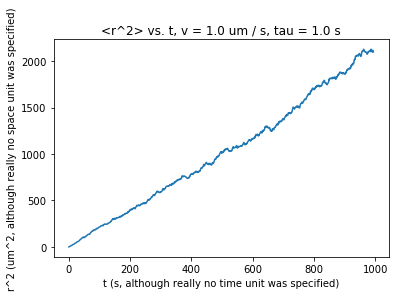

In [9]:
M = 100

N = 1000
v = 1.0
tau = 1.0

total_time = np.zeros(N + 1)
r_sq = np.zeros(N + 1)

for i in range(M):
    test = run_and_tumble(N, v, tau)

    total_time += np.cumsum(test[2])
    r_sq += test[0]**2 + test[1]**2

total_time = total_time / M
r_sq = r_sq / M

linear_fit = custom_regression(total_time, r_sq, [1])
print(linear_fit)

plt.clf()
plt.title('<r^2> vs. t, v = ' + str(v) + ' um / s, tau = ' + str(tau) + ' s')
plt.xlabel('t (s, although really no time unit was specified)')
plt.ylabel('r^2 (um^2, although really no space unit was specified)')
plt.plot(total_time, r_sq)

[ 20.17461414]


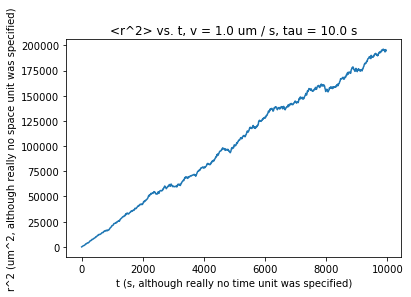

In [12]:
M = 100

N = 1000
v = 1.0
tau = 10.0

total_time = np.zeros(N + 1)
r_sq = np.zeros(N + 1)

for i in range(M):
    test = run_and_tumble(N, v, tau)

    total_time += np.cumsum(test[2])
    r_sq += test[0]**2 + test[1]**2

total_time = total_time / M
r_sq = r_sq / M

linear_fit = custom_regression(total_time, r_sq, [1])
print(linear_fit)

plt.clf()
plt.title('<r^2> vs. t, v = ' + str(v) + ' um / s, tau = ' + str(tau) + ' s')
plt.xlabel('t (s, although really no time unit was specified)')
plt.ylabel('r^2 (um^2, although really no space unit was specified)')
plt.plot(total_time, r_sq)

[ 196.61097635]


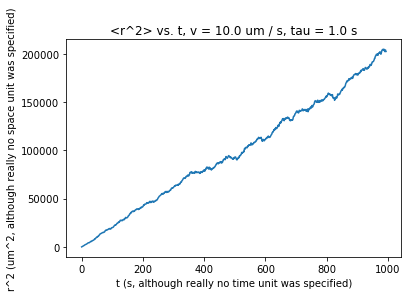

In [13]:
M = 100

N = 1000
v = 10.0
tau = 1.0

total_time = np.zeros(N + 1)
r_sq = np.zeros(N + 1)

for i in range(M):
    test = run_and_tumble(N, v, tau)

    total_time += np.cumsum(test[2])
    r_sq += test[0]**2 + test[1]**2

total_time = total_time / M
r_sq = r_sq / M

linear_fit = custom_regression(total_time, r_sq, [1])
print(linear_fit)

plt.clf()
plt.title('<r^2> vs. t, v = ' + str(v) + ' um / s, tau = ' + str(tau) + ' s')
plt.xlabel('t (s, although really no time unit was specified)')
plt.ylabel('r^2 (um^2, although really no space unit was specified)')
plt.plot(total_time, r_sq)

[ 2379.76332205]


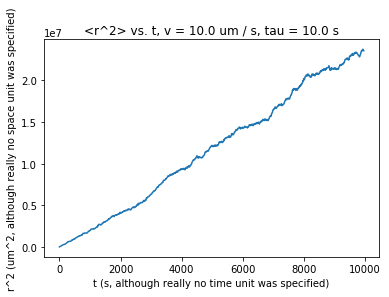

In [14]:
M = 100

N = 1000
v = 10.0
tau = 10.0

total_time = np.zeros(N + 1)
r_sq = np.zeros(N + 1)

for i in range(M):
    test = run_and_tumble(N, v, tau)

    total_time += np.cumsum(test[2])
    r_sq += test[0]**2 + test[1]**2

total_time = total_time / M
r_sq = r_sq / M

linear_fit = custom_regression(total_time, r_sq, [1])
print(linear_fit)

plt.clf()
plt.title('<r^2> vs. t, v = ' + str(v) + ' um / s, tau = ' + str(tau) + ' s')
plt.xlabel('t (s, although really no time unit was specified)')
plt.ylabel('r^2 (um^2, although really no space unit was specified)')
plt.plot(total_time, r_sq)

### Part c

Let's just estimate from the slopes of the graphs. We should have < r^2 > = 4 D t, so we'll just estimate D as slope / 4.

slope: 2016.21524923
D, measured from slope: 504.053812306
D, predicted: 500.0


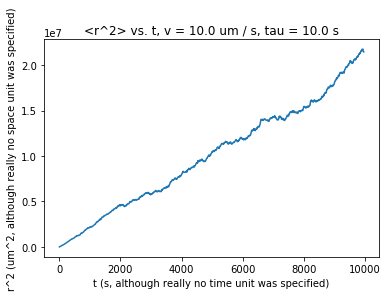

In [203]:
M = 100

N = 1000
v = 10.0
tau = 10.0

total_time = np.zeros(N + 1)
r_sq = np.zeros(N + 1)

for i in range(M):
    test = run_and_tumble(N, v, tau)

    total_time += np.cumsum(test[2])
    r_sq += test[0]**2 + test[1]**2

total_time = total_time / M
r_sq = r_sq / M

linear_fit = custom_regression(total_time, r_sq, [1])
print('slope: ' + str(linear_fit[0]))
print('D, measured from slope: ' + str(linear_fit[0] / 4.0))
print('D, predicted: ' + str(0.5 * v**2 * tau))

plt.clf()
plt.title('<r^2> vs. t, v = ' + str(v) + ' um / s, tau = ' + str(tau) + ' s')
plt.xlabel('t (s, although really no time unit was specified)')
plt.ylabel('r^2 (um^2, although really no space unit was specified)')
plt.plot(total_time, r_sq)

In [207]:
np.arange(0.0, 10.0 + 0.1, 0.1)

array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
         0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
         1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
         5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
         6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
         7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
         8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
         9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
         9.9,  10. ])

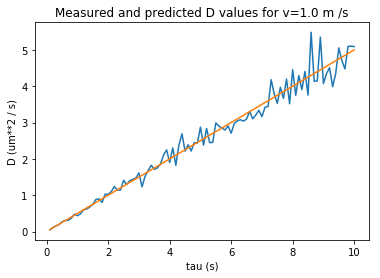

In [217]:
M = 100

N = 1000
v = 1.0

tau_list = np.arange(0.1, 10.0 + 0.1, 0.1)
D_measured = np.array([])
D_predicted = 0.5 * v**2 * tau_list

for i in range(len(tau_list)):
    
    tau = tau_list[i]

    total_time = np.zeros(N + 1)
    r_sq = np.zeros(N + 1)

    for i in range(M):
        test = run_and_tumble(N, v, tau)

        total_time += np.cumsum(test[2])
        r_sq += test[0]**2 + test[1]**2

    total_time = total_time / M
    r_sq = r_sq / M

    linear_fit = custom_regression(total_time, r_sq, [1])
    D = linear_fit[0] / 4.0
    D_measured = np.append(D_measured, np.array([D]))

plt.clf()
plt.title('Measured and predicted D values for v=1.0 m /s')
plt.xlabel('tau (s)')
plt.ylabel('D (um**2 / s)')
plt.plot(tau_list, D_measured)
plt.plot(tau_list, D_predicted)

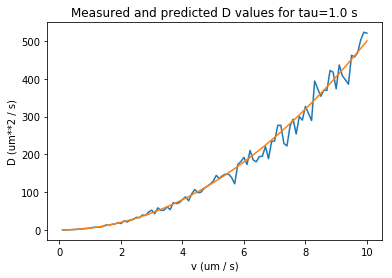

In [220]:
M = 100

N = 1000
tau = 10.0

v_list = np.arange(0.1, 10.0 + 0.1, 0.1)
D_measured = np.array([])
D_predicted = 0.5 * v_list**2 * tau

for i in range(len(v_list)):
    
    v = v_list[i]

    total_time = np.zeros(N + 1)
    r_sq = np.zeros(N + 1)

    for i in range(M):
        test = run_and_tumble(N, v, tau)

        total_time += np.cumsum(test[2])
        r_sq += test[0]**2 + test[1]**2

    total_time = total_time / M
    r_sq = r_sq / M

    linear_fit = custom_regression(total_time, r_sq, [1])
    D = linear_fit[0] / 4.0
    D_measured = np.append(D_measured, np.array([D]))

plt.clf()
plt.title('Measured and predicted D values for tau=1.0 s')
plt.xlabel('v (um / s)')
plt.ylabel('D (um**2 / s)')
plt.plot(v_list, D_measured)
plt.plot(v_list, D_predicted)